In [7]:
import albumentations as A
from PIL import Image
import numpy as np

transform = A.Compose([A.HorizontalFlip(p=0.5),
                            A.RandomBrightnessContrast(p=0.2)
                                 ])
img_path = 'data/train/TRAIN_00000.jpg'
image = Image.open(img_path)
image = np.array(image)
image = transform(image=image)['image']
pil_image=Image.fromarray(image)
pil_image.show()

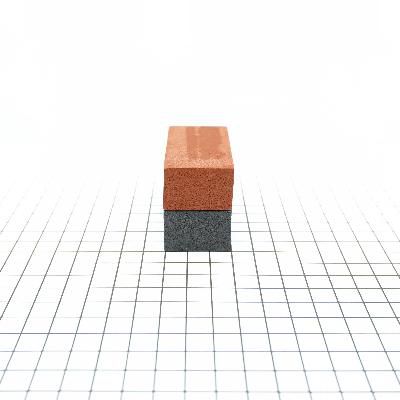

In [9]:
display(pil_image)

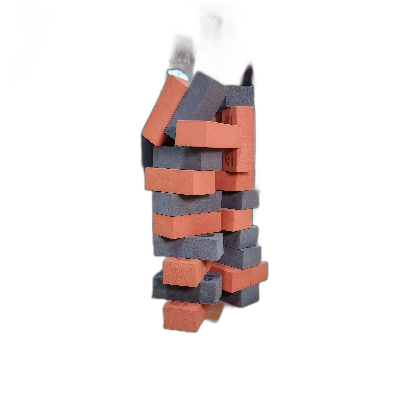

In [44]:
from rembg import remove
from PIL import Image

input_path = 'data/test/TEST_00008.jpg'


input = Image.open(input_path)
output = remove(input)
display(output)

In [54]:

background = Image.open('back.jpg')

resize_back =  background.resize((400, 400))

output = output.convert("RGB")
resize_back.paste(output, (0, 0), output)
resize_back

r = convert_tensor(resize_back)
transform(r[[0,1,2],:,:])

ValueError: bad transparency mask

In [22]:
from torchvision import transforms

convert_tensor = transforms.ToTensor()

o = convert_tensor(output)

In [23]:
o.size()

torch.Size([4, 400, 400])

In [24]:
i = convert_tensor(input)
i.size()

torch.Size([3, 400, 400])

In [33]:
o[:3,:,:].size()

torch.Size([3, 400, 400])

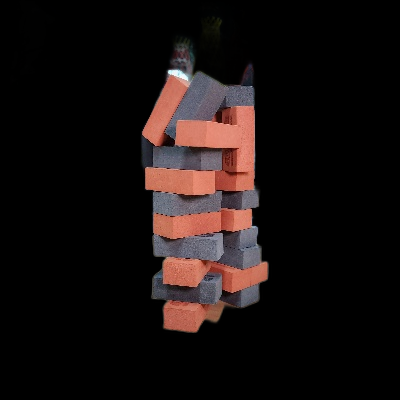

In [42]:
import torchvision.transforms as T

transform = T.ToPILImage()
img = transform(o[[0,1,2],:,:])
img

In [ ]:
background = Image.open('back.jpg')

resize_back =  background.resize((400, 400))


resize_back.paste(img, (0, 0), img)
resize_back

In [99]:
from PIL import Image
import numpy as np
import os 

file_list = os.listdir('data/test')

for i in range(len(file_list)):
    name,_ = file_list[i].split('.')
    image1Path = f"data/test/{name}.jpg"
    image2Path = f"data/test_rembg/{name}.png"

    image1     = Image.open(image1Path)
    image2     = Image.open(image2Path).convert("RGB")

    buffer1    = np.array(image1)
    buffer2    = np.array(image2)

    buffer3  = buffer1 - buffer2

    for i in range(400):
        for j in range(400):
            if sum(buffer3[i][j]) < 200 :
                if j < 50 :
                    continue
                buffer3[i][j] = buffer3[i][j-50]
                
    differenceImage  = Image.fromarray(buffer3)
    differenceImage.save(f'data/test_bgd/{name}.jpg')
    
#image1.show()
#image2.show()
#differenceImage.show()
#image3.show()
#Image.fromarray(buffer4).show()
#differenceImage.paste(image3,(0,0),image3).show()


In [100]:
print('finished')

finished


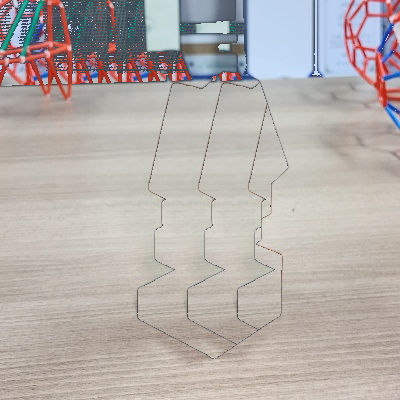

In [93]:
df = pd.read_csv('data/val_rembg.csv')

saved_path=[]
bgn_path = os.listdir('data/test_bgd')

cnt=0
for img_path in df['img_path']:
    
    image = Image.open('data'+img_path[1:])
    file_name = img_path.split('/')[-1].split('.')[0]
    background = Image.open(bgn_path[cnt%len(bgn_path)])
    background.paste(image,(0,0),image)
    background.save(f'data/valid/'+file_name+'.jpg')
    
    saved_path.append(f'./valid/'+file_name+'.jpg')
    cnt+=1
    
df['img_path'] = saved_path
df.to_csv('data/valid.csv')


In [114]:
df = pd.read_csv('data/train_rembg.csv')
df['img_path'] = [ './train_rembg/'+img_path.split('/')[-1].split('.')[0]+'.png' for img_path in df['img_path']]
df.to_csv('data/train_rembg.csv',index=False)

In [115]:
df = pd.read_csv('data/test_rembg.csv')
df['img_path'] = [ './test_rembg/'+img_path.split('/')[-1].split('.')[0]+'.png' for img_path in df['img_path']]
df.to_csv('data/test_rembg.csv',index=False)

In [117]:
df = pd.read_csv('data/test_rembg.csv')
df

,id,img_path
0,TEST_00000,./test_rembg/TEST_00000.png
1,TEST_00001,./test_rembg/TEST_00001.png
2,TEST_00002,./test_rembg/TEST_00002.png
3,TEST_00003,./test_rembg/TEST_00003.png
4,TEST_00004,./test_rembg/TEST_00004.png
...,...,...
1455,TEST_01455,./test_rembg/TEST_01455.png
1456,TEST_01456,./test_rembg/TEST_01456.png
1457,TEST_01457,./test_rembg/TEST_01457.png
1458,TEST_01458,./test_rembg/TEST_01458.png
